In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


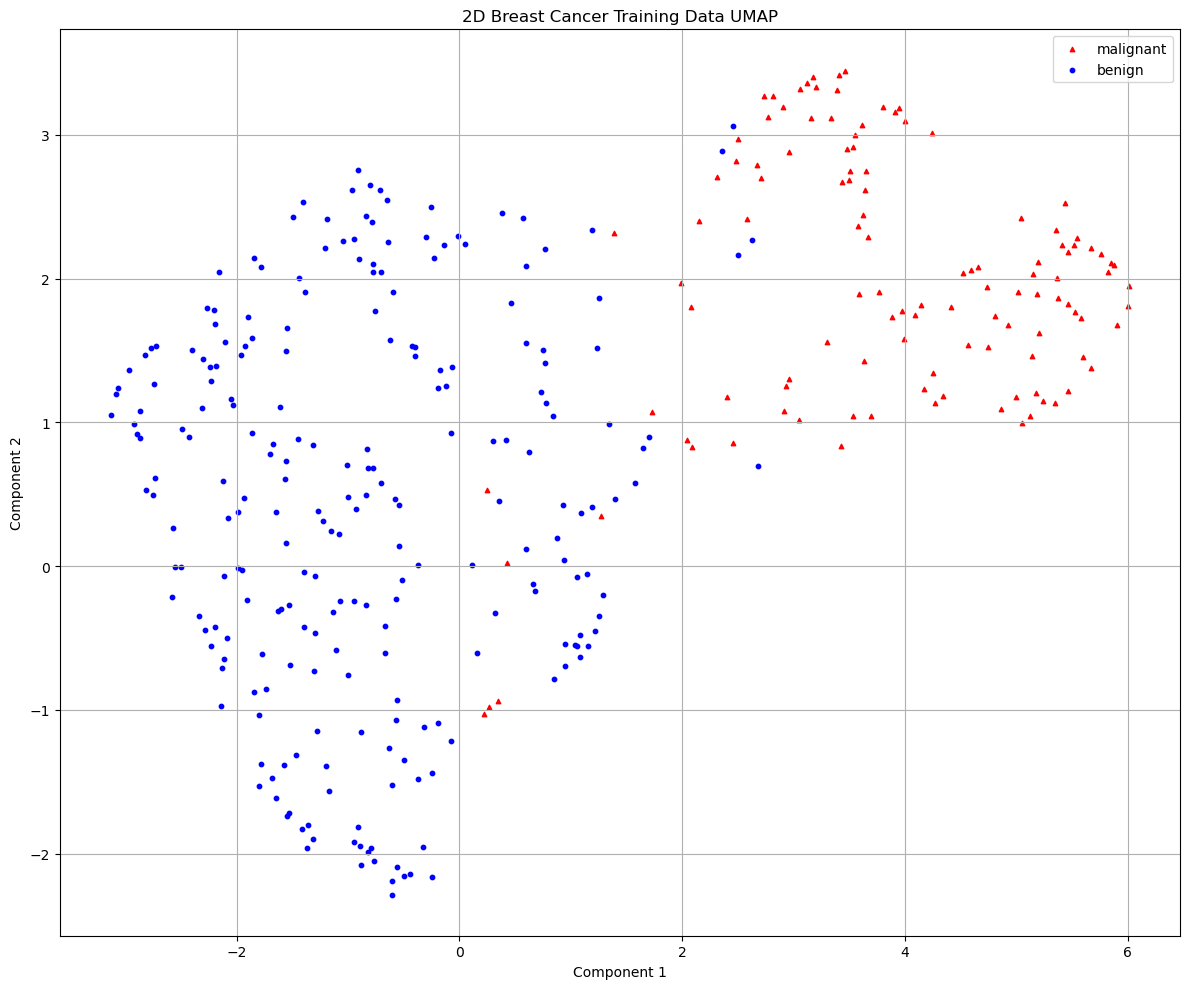

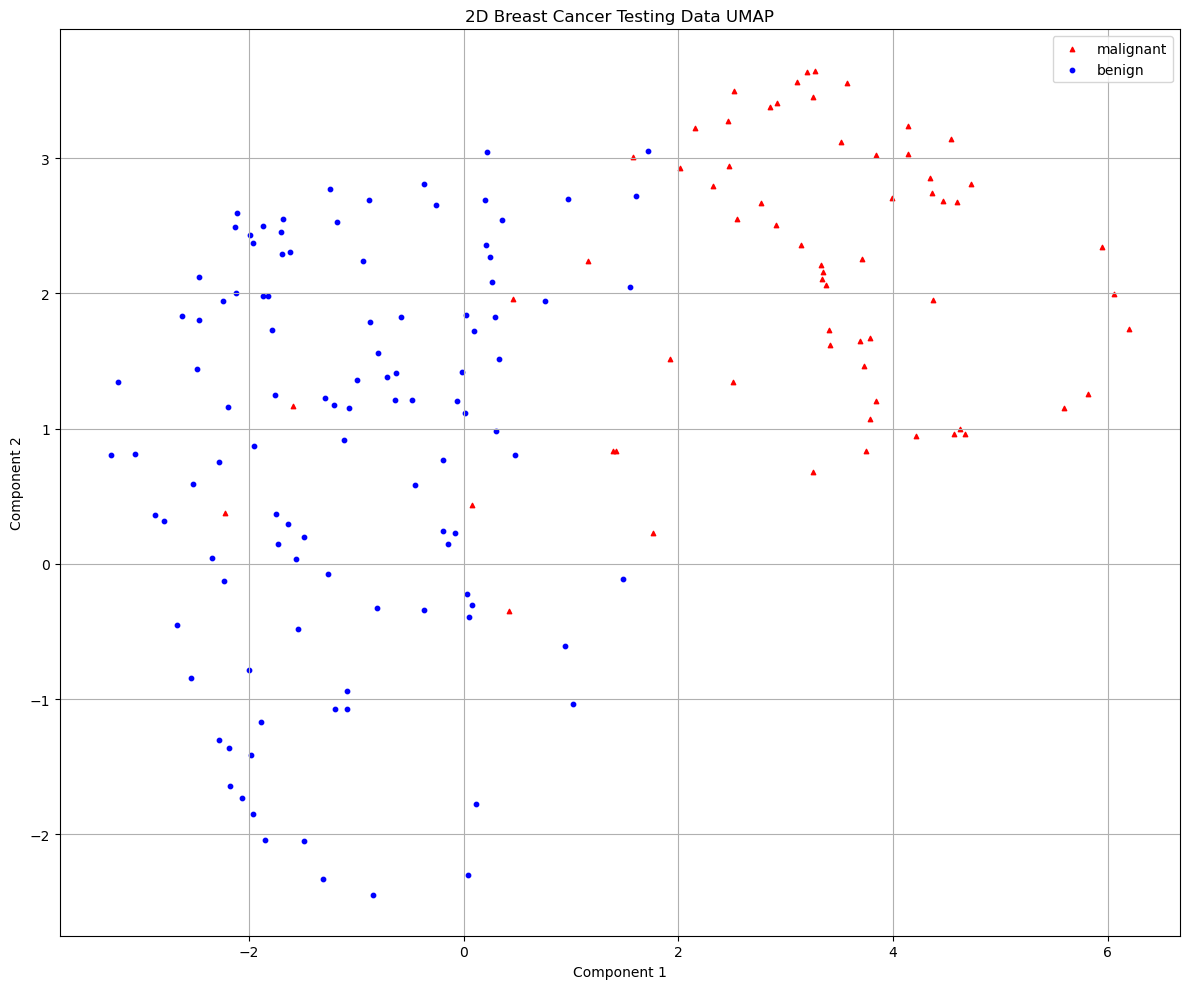

[I 2025-04-27 02:30:23,265] A new study created in memory with name: no-name-3f3c6c91-705d-4bbd-8214-fa18a533c133
[I 2025-04-27 02:30:23,493] Trial 0 finished with value: 0.960241448692153 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 24, 'p': 2}. Best is trial 0 with value: 0.960241448692153.
[I 2025-04-27 02:30:23,575] Trial 1 finished with value: 0.9404426559356137 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 14, 'p': 2}. Best is trial 0 with value: 0.960241448692153.
[I 2025-04-27 02:30:23,723] Trial 2 finished with value: 0.9576257545271629 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 35, 'p': 1}. Best is trial 0 with value: 0.960241448692153.
[I 2025-04-27 02:30:23,875] Trial 3 finished with value: 0.9630583501006036 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 40, 'p': 1}. Best is trial 3 wi

Best trial:
Accuracy: 0.9717505030181087
Best hyperparameters:  {'n_neighbors': 13, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 28, 'p': 1}


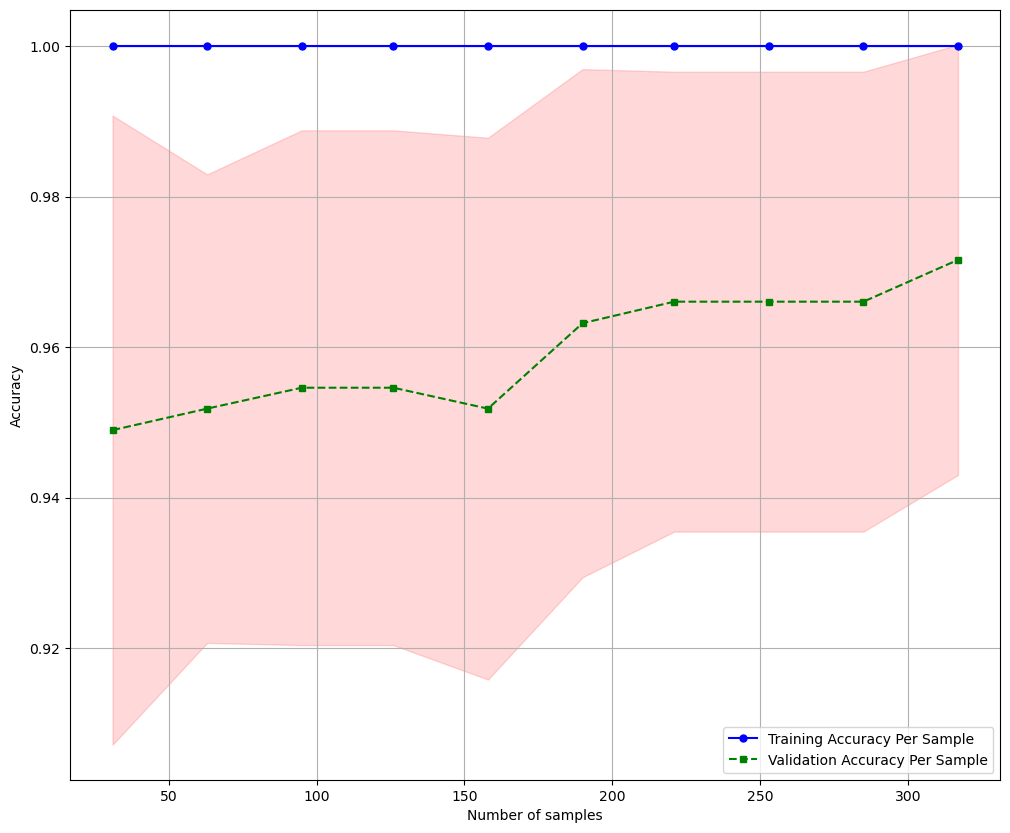

Confusion Matrix
[[ 55   9]
 [  2 105]]
Accuracy: 0.9357, Precision: 0.9211, Recall: 0.9813, F1: 0.9502, AUC:0.9685


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)